<h1>0 - Features engineering</h1>

Import libraries

In [1]:
import pandas as pd
import os
import numpy as np

enableFeatureEngineering = False

<h3>Create new users dataframes with features engineering</h3>

In [2]:
# function
maxTransitions = 6
def returnFeaturesEnginnering(df):
    # First column always is an "one"
    df[0] = 0

    dataframelenght = len(df.index)
    dataList = []

    # For cada element of dataframe, count how many transitions between 1 and 0
    # exists
    for i in range(0, dataframelenght):
        # Must exist a transition in the last column to the script
        # count corretly the number of transitions
        line = df.iloc[i,:180]
        if line[179] == 0:        
            line[180] = 1
        else:
            line[180] = 0
        lineT = line.T.to_list()
        trans = np.bitwise_xor(lineT[0:-1],lineT[1:])
        trans.tolist()
        pos = np.where(trans == 1)
        temp = pos[0][1:] - pos[0][0:-1]
        # fill the line with zeros
        tamanho = temp.__len__()
        temp = np.resize(temp, maxTransitions)
        for k in range(tamanho, maxTransitions):
            temp[k] = 0

        dataList.append(temp.tolist())

    # Replace all the not a numbers to zeros
    frame = pd.DataFrame(dataList)
    frame = frame.replace (np.nan, 0)
    return frame

<h1>1. Prepare dataframes</h1>

Prepare Renan's dataframe

In [3]:
renan = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Renan"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)          
          
          # Execute only if available
          if enableFeatureEngineering:
               df = returnFeaturesEnginnering(df)
          
          df["Target letter"] = targetLetter
          df["Target person"] = "Renan"

          renan = pd.concat([renan,df])
          
renan = renan.reset_index(drop=True)
renan          

""


In [4]:
renan

""


Prepare Claudinei's dataframe

In [5]:
claudinei = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Claudinei"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)

          # Execute only if available
          if enableFeatureEngineering:
               df = returnFeaturesEnginnering(df)

          df["Target letter"] = targetLetter
          df["Target person"] = "Claudinei"

          claudinei = pd.concat([claudinei,df])
          
claudinei = claudinei.reset_index(drop=True)    


Prepare Guilherme's dataframe

In [6]:
guilherme = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Guilherme"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)

          # Execute only if available
          if enableFeatureEngineering:
               df = returnFeaturesEnginnering(df)

          df["Target letter"] = targetLetter
          df["Target person"] = "Guilherme"

          guilherme = pd.concat([guilherme,df])
          
guilherme = guilherme.reset_index(drop=True)    

Merge the group dataframe

In [7]:
groupDataframe = pd.concat([renan,claudinei,guilherme])
groupDataframe = groupDataframe.sample(frac=1)
groupDataframe = groupDataframe.reset_index(drop=True)

# Execute only if available
if enableFeatureEngineering:
    groupDataframe.columns = ["First cicle in 1", "First cicle in 0", "Second cicle in 1", "Second cicle in 0", "Third cicle in 1", "Third cicle in 0", "Target Letter", "Target person"]

groupDataframe

""


<h1>2. Training</h1>

Merge dataframes

In [8]:
import pandas as pd

<h3>2.1 Neural network</h3>

Import libraries

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


<h2>Preparation for training</h2>

In [10]:
# Execute only if available
if enableFeatureEngineering:
    X = groupDataframe.iloc[:,0:maxTransitions]
else:
    X = groupDataframe.iloc[:,0:180]
X

""


Letter as target

In [11]:
# Execute only if available
if enableFeatureEngineering:
    Y1 = groupDataframe.iloc[:,maxTransitions]
else:
    Y1 = groupDataframe.iloc[:,180]
Y1

IndexError: single positional indexer is out-of-bounds

Person as target

In [ ]:
# Execute only if available
if enableFeatureEngineering:    
    Y2 = groupDataframe.iloc[:,maxTransitions+1]
else:
    Y2 = groupDataframe.iloc[:,181]
Y2

0       Guilherme
1       Claudinei
2       Guilherme
3       Claudinei
4           Renan
          ...    
3637        Renan
3638    Guilherme
3639    Claudinei
3640    Guilherme
3641        Renan
Name: Target person, Length: 3642, dtype: object

Create data for training and for testing

In [ ]:
seed = random.randrange(1268) 

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=4845)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.3, random_state=478)

<h3>Training</h3>

In [ ]:
seed = random.randrange(1268) 
clf1 = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(3,6), random_state=1, max_iter=20000, activation='logistic') #2 camadas ocultas com 2 neurônios
clf1.fit(X1_train, np.ravel(y1_train))

MLPClassifier(activation='logistic', hidden_layer_sizes=(3, 6), max_iter=20000,
              random_state=1)

In [ ]:
seed = random.randrange(1268) 
clf2 = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(150,120), random_state=seed, max_iter=5000, activation='relu') #2 camadas ocultas com 2 neurônios
clf2.fit(X2_train, np.ravel(y2_train))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(150, 120), max_iter=5000,
              random_state=946, solver='sgd')

Testing

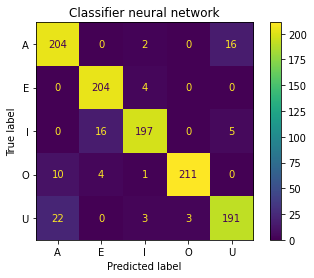

In [ ]:
y1_pred = clf1.predict(X1_test)
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred)
plt.title('Classifier neural network')
plt.show()

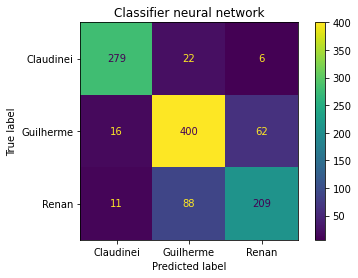

In [ ]:
y2_pred = clf2.predict(X2_test)
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred)
plt.title('Classifier neural network')
plt.show()

In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           A       0.86      0.92      0.89       222
           E       0.91      0.98      0.94       208
           I       0.95      0.90      0.93       218
           O       0.99      0.93      0.96       226
           U       0.90      0.87      0.89       219

    accuracy                           0.92      1093
   macro avg       0.92      0.92      0.92      1093
weighted avg       0.92      0.92      0.92      1093



In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

   Claudinei       0.91      0.91      0.91       307
   Guilherme       0.78      0.84      0.81       478
       Renan       0.75      0.68      0.71       308

    accuracy                           0.81      1093
   macro avg       0.82      0.81      0.81      1093
weighted avg       0.81      0.81      0.81      1093



<h1> Deep learning</h1>

In [ ]:
import math
import numpy as np
import tensorflow as tf
from keras import layers

In [ ]:
SAMPLES = 1000
np.random.seed(1337)
x_values = X.to_numpy()
# sorteia e adiciona ruído
Y1 = Y1.replace("A", 0)
Y1 = Y1.replace("E", 1)
Y1 = Y1.replace("I", 2)
Y1 = Y1.replace("O", 3)
Y1 = Y1.replace("U", 4)

y_values = Y1.to_numpy()

# divide dados em treinamento, validação e teste
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# cria uma rede neural de 2 camadas de 16 neurônicos cada
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(None, 180)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(5, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=500, batch_size=16, validation_data=(x_validate, y_validate))




Epoch 1/500
38/38 [==============================] - 1s 13ms/step - loss: 1.4138 - accuracy: 0.3700 - val_loss: 1.2935 - val_accuracy: 0.3800
Epoch 2/500
38/38 [==============================] - 0s 8ms/step - loss: 1.1722 - accuracy: 0.5000 - val_loss: 1.0990 - val_accuracy: 0.5489
Epoch 3/500
38/38 [==============================] - 0s 8ms/step - loss: 0.9939 - accuracy: 0.6517 - val_loss: 0.9456 - val_accuracy: 0.6890
Epoch 4/500
38/38 [==============================] - 0s 10ms/step - loss: 0.8523 - accuracy: 0.7433 - val_loss: 0.8152 - val_accuracy: 0.7716
Epoch 5/500
38/38 [==============================] - 0s 8ms/step - loss: 0.7246 - accuracy: 0.8000 - val_loss: 0.6873 - val_accuracy: 0.7980
Epoch 6/500
38/38 [==============================] - 0s 8ms/step - loss: 0.5992 - accuracy: 0.8500 - val_loss: 0.5697 - val_accuracy: 0.8279
Epoch 7/500
38/38 [==============================] - 0s 8ms/step - loss: 0.4911 - accuracy: 0.8683 - val_loss: 0.4922 - val_accuracy: 0.8663
Epoch 8/500

In [ ]:
num = 60
pred = model.predict(x_test[num].reshape(1, 1, 180, 1)) 
print(pred.argmax())
y_test[num]

1/1 [==============================] - 0s 47ms/step
1


1